In [23]:
from main_script import *
import numpy as np
np.set_printoptions(suppress=True)

In [2]:
tvec, data = load_measurements("2008.csv", "forward fill")

# tvec_a, data_a, period = aggregate_measurements(tvec, data, "minute")

In [159]:
def load_measurements(filename: str, fmode=None):
    # Ensuring a correct path and converting the csv to a numpy array:
    # abspath = os.path.dirname(os.path.abspath(__file__))
    # path = abspath + "/" + filename
    path = filename
    data = [row.split(",") for row in open(path, "r")]
    data = np.array(data,dtype=float)

    if fmode == "drop":
        data = data[np.all(data != -1, axis=1)]
        return data[:,:6], data[:,6:], ""
    elif fmode == "forward fill" and np.all(data[0] != -1): num = -1
    elif fmode == "backward fill" and np.all(data[-1] != -1): num = 1

    data = data[np.all(data != -1, axis=1)]
    for x, y in np.argwhere(data == -1):
        data[x][y] = data[x + num][y]
    err_msg = "err"
    suffix = err_msg

    return data[:,:6], data[:,6:], suffix

tvec, data, suffix = load_measurements("testdata2.csv", "drop")
tvec, data

(array([[2006.,    2.,   11.,    6.,    1.,    0.],
        [2006.,    7.,   14.,    9.,    3.,    0.]]),
 array([[5., 6., 1., 8.],
        [2., 3., 4., 5.]]))

In [154]:
fmode = "drop"
path = "testdata2.csv"
data = [row.split(",") for row in open(path, "r")]
data = np.array(data,dtype=float)

if fmode == "drop":
    data = data[np.all(data != -1, axis=1)]
    return data[:,:6], data[:,6:]

if fmode == "forward fill" and np.all(data[0] != -1): num = -1
elif fmode == "backward fill" and np.all(data[-1] != -1): num = 1

data = data[np.all(data != -1, axis=1)]
for x, y in np.argwhere(data == -1):
    data[x][y] = data[x + num][y]
err_msg = "err"
suffix = err_msg

return data[:,:6], data[:,6:], suffix

(array([[2006.,    2.,   11.,    6.,    1.,    0.],
        [2006.,    7.,   14.,    9.,    3.,    0.]]),
 array([[5., 6., 1., 8.],
        [2., 3., 4., 5.]]))

In [135]:
def aggregate_measurements(tvec: np.ndarray, data: np.ndarray, period="minute"):
    if period == "minute":
        # This conversion works assuming the data is sorted 
        init_val = tvec[0,:]
        relative_tvec = tvec - init_val
        # Converts the columns of relative_tvec to minutes and adds them:
        time_to_min_const = np.array([525948.766, 43829.0639, 1440, 60, 1, 1])
        min_tvec = np.sum(relative_tvec * time_to_min_const, axis=1, dtype=int)
        return min_tvec, data

    elif period == "hour of the day":  #AKA: hotd
        tvec_a = np.arange(24)
        hotd_data = []
        for hour in tvec_a:
            # Mask that only accepts elements that correspond to the currently iterated hour.
            mask = tvec[:,3] == hour
            is_not_empty = data[mask].size > 0
            # Takes mean of data only if list isn't empty to avoid RuntimeWarning.
            if is_not_empty: hotd_data.append(np.mean(data[mask], axis=0))
            else: hotd_data.append(np.zeros(4))
        return tvec_a, np.asarray(hotd_data)

    elif period == "hour": col = 3
    elif period == "day": col = 2
    elif period == "month": col = 1

    # Collects all the unique elements from the relevant time column.
    tvec_a = np.unique(tvec[:,col])
    # Does basically the same as hotd but takes sum instead of average.
    data_a = np.array([np.sum(data[tvec[:,col] == n], axis=0) for n in tvec_a])
    return tvec_a, data_a

In [139]:
tvec1, data1 = load_measurements("testdata3.csv", "backward fill")
tvec_a, data_a = aggregate_measurements(tvec1, data1, "hour of the day")
tvec_a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23])

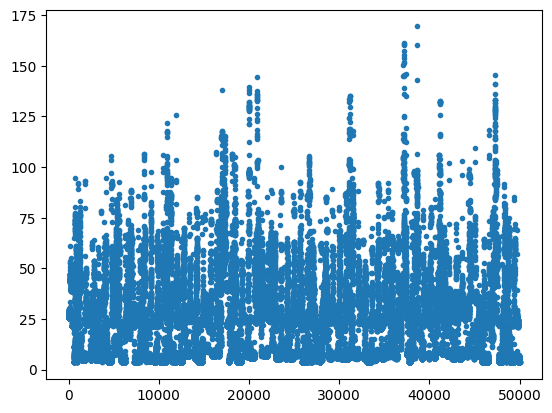

In [34]:
import matplotlib.pyplot as plt

plt.plot(tvec_a[:50000], data_a[:50000,3], linestyle="", marker=".");

In [18]:
type(data_a)

numpy.ndarray

In [3]:
tvec

array([[2008.,    1.,    1.,    0.,    0.,    0.],
       [2008.,    1.,    1.,    0.,    1.,    0.],
       [2008.,    1.,    1.,    0.,    2.,    0.],
       ...,
       [2008.,   12.,   31.,   23.,   57.,    0.],
       [2008.,   12.,   31.,   23.,   58.,    0.],
       [2008.,   12.,   31.,   23.,   59.,    0.]])

In [4]:
# tvec[:,-2]

month_idx = []

year, month, day, hour, minute, _ = 

tvec[-1,:] - tvec[0,:]

SyntaxError: invalid syntax (2430645008.py, line 5)

In [ ]:
def aggregate_measurements(tvec, data, period):
    if period == "hour":
        col = 3
    if period == "day":
        col = 2
    if period == "month":
        col = 1
    if period == "hour of the day":
        col = 3
    
    nums = np.unique(tvec[:,col])
    data_a = np.array([])
    tvec_a = np.array([])
    for n in nums:
        tvec_a = np.append(tvec_a, n)

        mask = tvec[:,col] == n
        data_a = np.append(data_a, np.sum(data[mask], axis=0))
    data_a = np.reshape(data_a, (-1,4))
    return tvec_a, data_a, period



In [17]:
9 in list(range(0))

False

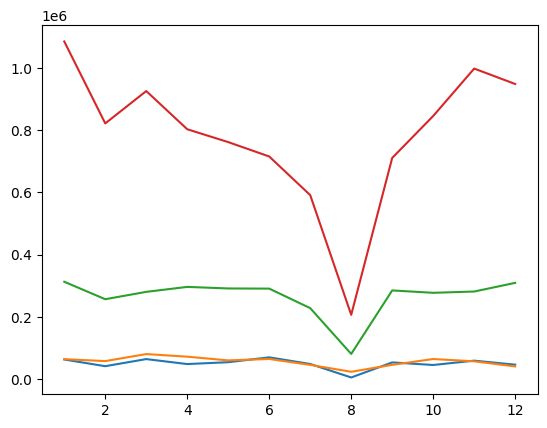

In [ ]:
import matplotlib.pyplot as plt
from main_script import aggregate_measurements

tvec_a, data_a, _ = aggregate_measurements(tvec,data,"month")

for i in range(4):
    plt.plot(tvec_a[:,1],data_a[:,i])

In [ ]:
tvec_a[:23]

array([[ 0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  2.,  0.,  0.,  0.,  0.],
       [ 0.,  3.,  0.,  0.,  0.,  0.],
       [ 0.,  4.,  0.,  0.,  0.,  0.],
       [ 0.,  5.,  0.,  0.,  0.,  0.],
       [ 0.,  6.,  0.,  0.,  0.,  0.],
       [ 0.,  7.,  0.,  0.,  0.,  0.],
       [ 0.,  8.,  0.,  0.,  0.,  0.],
       [ 0.,  9.,  0.,  0.,  0.,  0.],
       [ 0., 10.,  0.,  0.,  0.,  0.],
       [ 0., 11.,  0.,  0.,  0.,  0.],
       [ 0., 12.,  0.,  0.,  0.,  0.]])